In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
start_date = '2011-01-01'
end_date = '2023-08-31'

In [3]:
aapl=yf.download('AAPL',start=start_date, end=end_date)[['Close']]

[*********************100%***********************]  1 of 1 completed


In [4]:
aaplTrain=aapl['2011':'2023-06'];
aaplTest=aapl['2023-07':]

In [39]:
training_set = aaplTrain.iloc[:,[0]].values

In [40]:
training_set.shape

(3144, 1)

In [41]:
training_set

array([[ 11.77035713],
       [ 11.83178616],
       [ 11.92857075],
       ...,
       [189.25      ],
       [189.58999634],
       [193.97000122]])

In [42]:
###temp
training_set=training_set[2000:]
print(training_set.shape)

(1144, 1)


### Visualizing non-normalized data

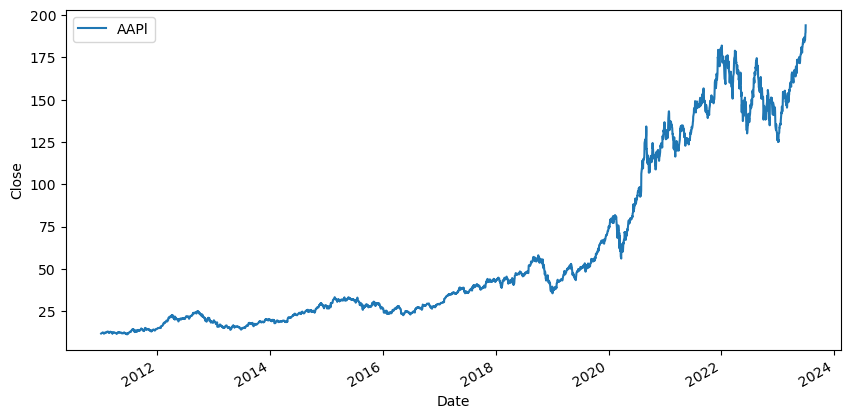

In [43]:
plt.figure(figsize=(10,5))
aaplTrain.Close.plot(label='AAPl');
plt.ylabel('Close')
plt.legend()

In [44]:
#scaling the datset- normalization
from sklearn.preprocessing import MinMaxScaler;
msc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=msc.fit_transform(training_set);

### Visualizing normalized data

ValueError: x and y must have same first dimension, but have shapes (3144,) and (1144, 1)

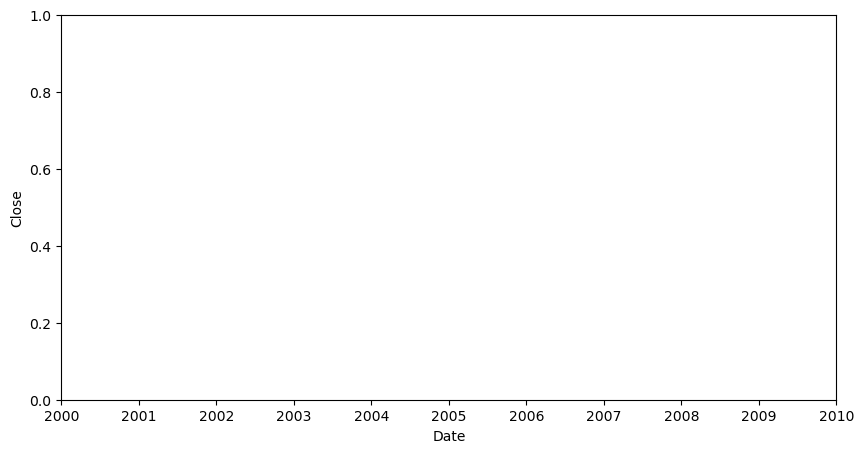

In [45]:
plt.figure(figsize=(10,5))
plt.xlabel('Date');
plt.ylabel('Close');
plt.plot(aaplTrain.index,training_set_scaled,label='AAPL');
plt.legend()

### Creating a data structure with 120 timesteps and 1 output

In [46]:
X_train=[];
y_train=[];
for i in range(120,len(training_set_scaled)):
    X_train.append(training_set_scaled[i-120:i,0]);
    y_train.append(training_set_scaled[i,0]);
X_train,y_train=np.array(X_train), np.array(y_train)

In [47]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],-1)

In [48]:
print(X_train.shape)

(1024, 120, 1)


### Building LSTM

In [50]:
from keras.layers import Input
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.layers import Dropout
from keras import Model

In [15]:
input=Input(shape=(X_train.shape[1],1))
firstlayer=LSTM(units=50, return_sequences=True)(input)
d=Dropout(0.2)(firstlayer)
secondlayer=LSTM(units=50, return_sequences=True)(d);
d=Dropout(0.2)(secondlayer)
thirdlayer=LSTM(units=50, return_sequences=True)(d);
d=Dropout(0.2)(thirdlayer)
fourthlayer=LSTM(units=50, return_sequences=False)(d);
d=Dropout(0.2)(fourthlayer);
finallayer=Dense(units=1)(d);
lstmmodel=Model(input,finallayer)

In [54]:
model=Sequential()
model.add(LSTM(50,input_shape=(120,1),return_sequences=True))
model.add(LSTM(32, input_shape=(120,1),return_sequences=False))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 1, batch_size = 1)

1024/1024 [==============================] - 45s 42ms/step - loss: 0.0025


In [55]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 120, 50)           10400     
                                                                 
 lstm_13 (LSTM)              (None, 32)                10624     
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 21,057
Trainable params: 21,057
Non-trainable params: 0
_________________________________________________________________


In [16]:
lstmmodel.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [17]:
lstmmodel.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
95/95 [==============================] - 21s 130ms/step - loss: 0.0081
Epoch 2/100
95/95 [==============================] - 16s 166ms/step - loss: 0.0024
Epoch 3/100
95/95 [==============================] - 17s 175ms/step - loss: 0.0022
Epoch 4/100
95/95 [==============================] - 17s 174ms/step - loss: 0.0022
Epoch 5/100
95/95 [==============================] - 16s 172ms/step - loss: 0.0022
Epoch 6/100
95/95 [==============================] - 18s 188ms/step - loss: 0.0018
Epoch 7/100
95/95 [==============================] - 25s 266ms/step - loss: 0.0017
Epoch 8/100
95/95 [==============================] - 28s 292ms/step - loss: 0.0016
Epoch 9/100
95/95 [==============================] - 25s 258ms/step - loss: 0.0015
Epoch 10/100
95/95 [==============================] - 23s 245ms/step - loss: 0.0015
Epoch 11/100
95/95 [==============================] - 24s 250ms/step - loss: 0.0014
Epoch 12/100
95/95 [==============================] - 23s 247ms/step - loss: 0.0015
E

In [18]:
lstmmodel.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 120, 1)]          0         
                                                                 
 lstm (LSTM)                 (None, 120, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 120, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 120, 50)           20200     
                                                                 
 dropout_1 (Dropout)         (None, 120, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 120, 50)           20200     
                                                                 
 dropout_2 (Dropout)         (None, 120, 50)           0     

### Testing our model

In [19]:
dataset_test = aaplTest
real_stock_price = dataset_test.iloc[:, [0]].values

In [20]:
real_stock_price

array([[192.46000671],
       [191.33000183],
       [191.80999756],
       [190.67999268],
       [188.61000061],
       [188.08000183],
       [189.77000427],
       [190.53999329],
       [190.69000244],
       [193.99000549],
       [193.72999573],
       [195.1000061 ],
       [193.13000488],
       [191.94000244],
       [192.75      ],
       [193.61999512],
       [194.5       ],
       [193.22000122],
       [195.83000183],
       [196.44999695],
       [195.61000061],
       [192.58000183],
       [191.16999817],
       [181.99000549],
       [178.8500061 ],
       [179.80000305],
       [178.19000244],
       [177.97000122],
       [177.78999329],
       [179.46000671],
       [177.44999695],
       [176.57000732],
       [174.        ],
       [174.49000549],
       [175.83999634],
       [177.22999573],
       [181.11999512],
       [176.38000488],
       [178.61000061],
       [180.19000244],
       [184.11999512]])

### Visualizing AAPL test data

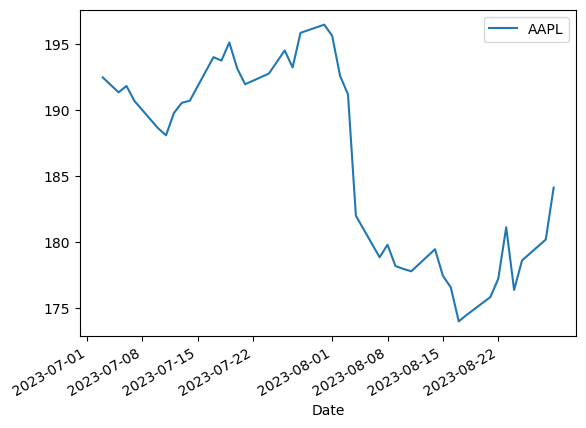

In [21]:
dataset_test.Close.plot(label='AAPL')
plt.legend(loc='best')

### Dataset Preparation

In [22]:
dataset_total=pd.concat((aaplTrain.Close,dataset_test.Close),axis=0)

In [23]:
inputs=dataset_total.iloc[len(dataset_total)-len(dataset_test)-120:].values

In [24]:
inputs=inputs.reshape(-1,1)

In [25]:
inputs = msc.transform(inputs)

In [26]:
X_test = []
for i in range(120, len(inputs)):
    X_test.append(inputs[i-120:i, 0])

In [27]:
X_test=np.array(X_test)

In [28]:
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],-1);

In [29]:
X_test.shape

(41, 120, 1)

In [30]:
y_pred=lstmmodel.predict(X_test)

2/2 [==============================] - 9s 49ms/step


In [31]:
y_pred_inverse_scaled=msc.inverse_transform(y_pred)

In [32]:
y_pred_inverse_scaled
predicted=list(y_pred_inverse_scaled.flat)

### Visualizing the real vs prediction data

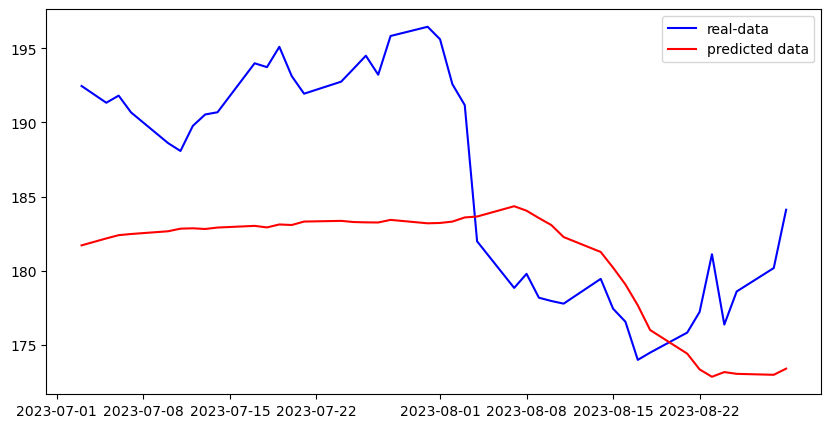

In [33]:
plt.figure(figsize=(10, 5))
plt.plot(aaplTest.index,aaplTest.Close,label='real-data',color='blue');
plt.plot(aaplTest.index,predicted,label='predicted data', color='red');
plt.legend(loc='best')

### Evaluating the LSTM- RMSE and relative error

In [34]:
import math
def rmse(true_values, predicted_values):
    if len(true_values) != len(predicted_values):
        raise ValueError("The lengths of true_values and predicted_values must be the same.")
    squared_errors = [(true - pred) ** 2 for true, pred in zip(true_values, predicted_values)]
    mean_squared_error = sum(squared_errors) / len(true_values)
    rmse_value = math.sqrt(mean_squared_error)
    return rmse_value

rmse=rmse(real_stock_price,predicted)
relative_error= rmse/(max(real_stock_price)-min(real_stock_price))

In [35]:
print('RMSE: ',round(rmse,3));
print('Percentage of error is: ',round((relative_error[0]*100),3),'%');

RMSE:  8.021
Percentage of error is:  35.729 %
